In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

seed_value = 42
import random

np.random.seed(seed_value)
random.seed(seed_value)
import missingno as mn
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

/home/balde/Downloads/AUR/y/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
sub = pd.read_csv('sample_submission.csv')
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [4]:
test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


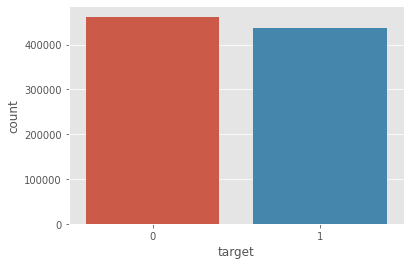

In [5]:
sns.countplot(train.target)
plt.show()

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [7]:
train['f_27'].value_counts()

BBBBBBCJBC    12
BCBBBBCLBC    12
BBBBBBDPCB    10
BBBBBBDKBC    10
ADBBBACQBC    10
              ..
BFAFAADTCE     1
BBBDAACOAE     1
BBABAACGBB     1
BFAABAGSDB     1
BCAACADSCE     1
Name: f_27, Length: 741354, dtype: int64

<AxesSubplot:>

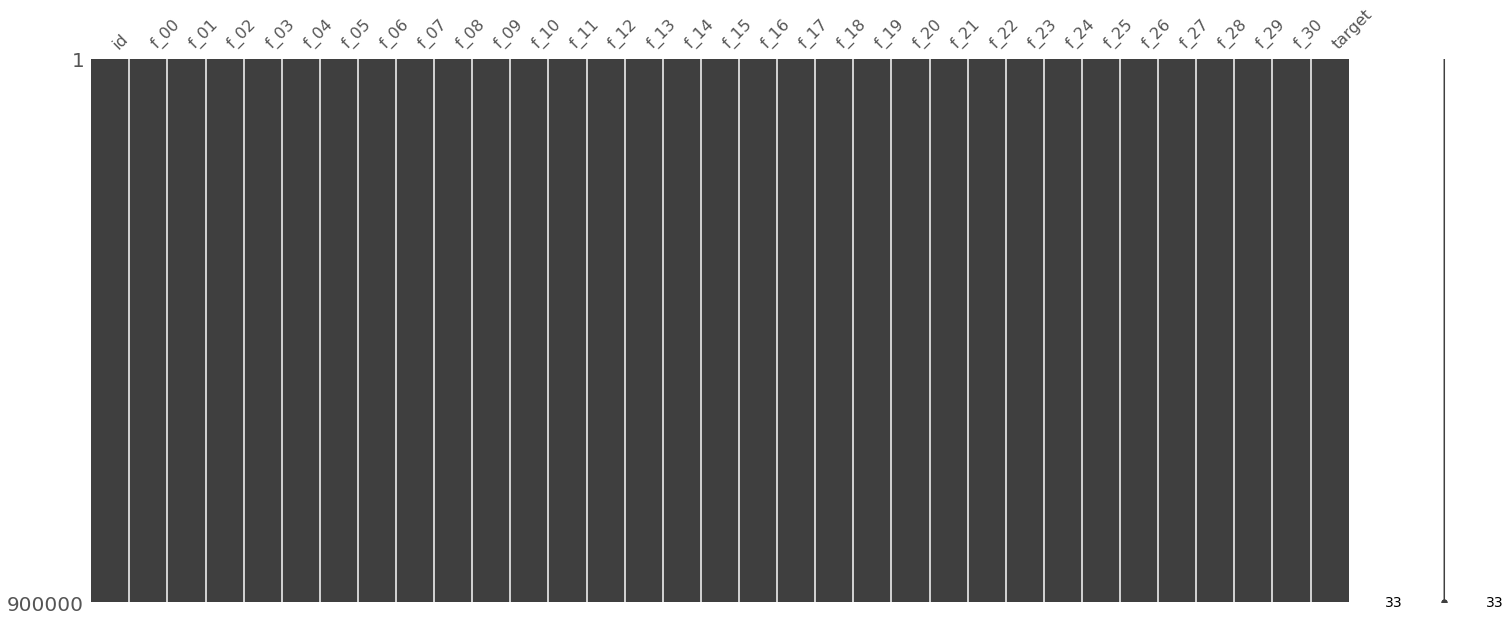

In [8]:
mn.matrix(train)

<AxesSubplot:>

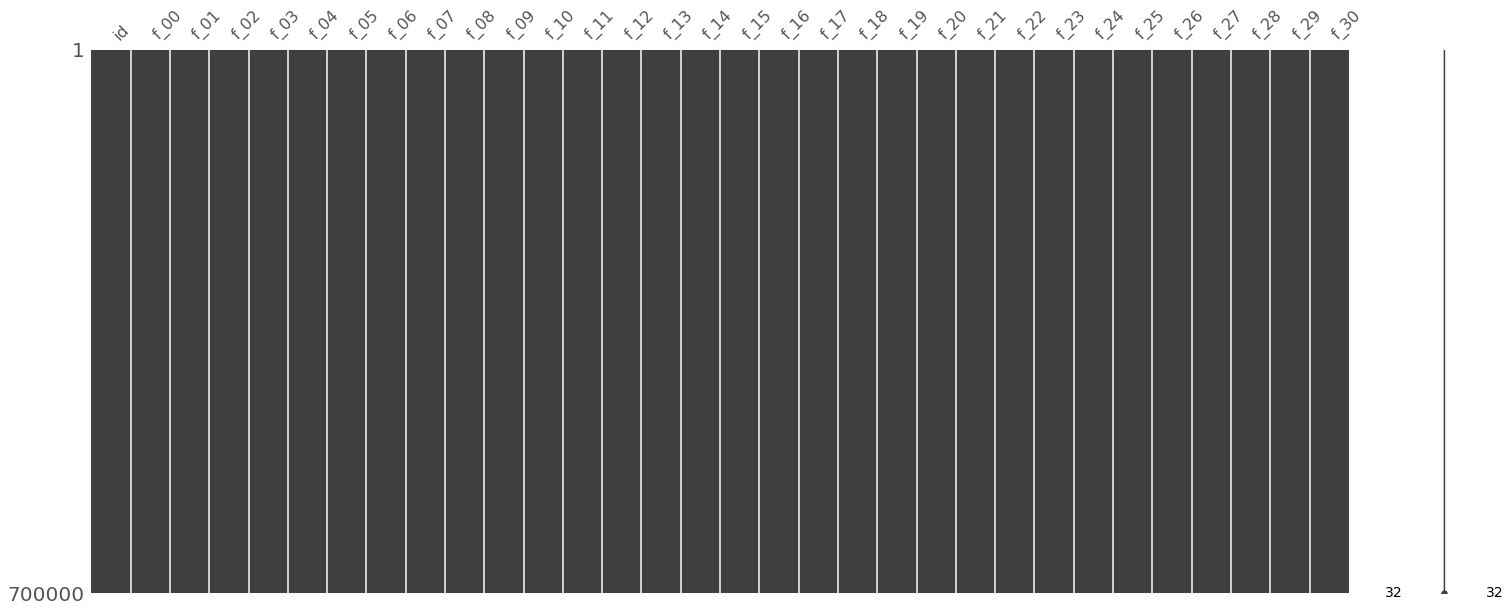

In [9]:
mn.matrix(test)

In [10]:
train.loc[:, 'f_00':'target'].describe().T.style.bar(subset=['mean'], color='#206ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
f_00,900000.000000,-0.000286,0.998888,-4.599856,-0.675490,0.001144,0.674337,4.749301
f_01,900000.000000,0.001165,0.999193,-4.682199,-0.675162,0.002014,0.675021,4.815699
f_02,900000.000000,0.001174,1.000514,-4.642676,-0.674369,0.002218,0.677505,4.961982
f_03,900000.000000,-0.001368,1.000175,-4.658816,-0.676114,-0.002227,0.672544,4.454920
f_04,900000.000000,-0.000571,1.000167,-4.748501,-0.675909,-0.001662,0.673789,4.948983
f_05,900000.000000,0.000284,0.999875,-4.750214,-0.673437,-0.000438,0.675028,4.971881
f_06,900000.000000,-0.000709,0.999942,-4.842919,-0.674876,-0.001492,0.674749,4.822668
f_07,900000.000000,2.031460,1.656172,0.000000,1.000000,2.000000,3.000000,15.000000
f_08,900000.000000,2.057998,1.590955,0.000000,1.000000,2.000000,3.000000,16.000000
f_09,900000.000000,2.362431,1.637706,0.000000,1.000000,2.000000,3.000000,14.000000


In [11]:
def drop_columns(df):
    df = df.drop(['id'],axis=1)
    return df


train = drop_columns(train)
test = drop_columns(test)

## Features Engineering

This preprocessing technique is from kaggle to find more click [Link to kaggle]('https://www.kaggle.com/code/akioonodera/tps-may2022-lgbm-binary')

In [12]:
%%time
def features_engineering(df):
    df = train
    for i in range(10):
        temp = []
        for j in range(len(train)):
            temp.append(train['f_27'][j][i])
        df['f_27_' + str(i + 1)] = temp
    return df

# appling the function on the  training and test set

train = features_engineering(train)
test = features_engineering(test)

CPU times: user 1min 40s, sys: 23.1 ms, total: 1min 40s
Wall time: 1min 41s


In [13]:
train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_27_10
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,A,B,A,B,D,A,D,B,A,B
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,A,C,A,C,C,A,D,C,E,B
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,A,A,A,E,A,B,C,K,A,D
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,B,D,B,B,A,A,C,B,C,B
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,B,D,B,C,B,B,C,H,F,E


In [14]:

# le = LabelEncoder()

# #all['f_27_le'] = le.fit_transform(tmp_all['f_27'])

# labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
# le.fit(labels)
# for i in range(10):
#     train['f_27_' + str(i + 1)] = le.transform(train['f_27_' + str(i + 1)])

# train

In [15]:
train.loc[:, train.dtypes == 'object'] =\
    train.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   f_00     900000 non-null  float64 
 1   f_01     900000 non-null  float64 
 2   f_02     900000 non-null  float64 
 3   f_03     900000 non-null  float64 
 4   f_04     900000 non-null  float64 
 5   f_05     900000 non-null  float64 
 6   f_06     900000 non-null  float64 
 7   f_07     900000 non-null  int64   
 8   f_08     900000 non-null  int64   
 9   f_09     900000 non-null  int64   
 10  f_10     900000 non-null  int64   
 11  f_11     900000 non-null  int64   
 12  f_12     900000 non-null  int64   
 13  f_13     900000 non-null  int64   
 14  f_14     900000 non-null  int64   
 15  f_15     900000 non-null  int64   
 16  f_16     900000 non-null  int64   
 17  f_17     900000 non-null  int64   
 18  f_18     900000 non-null  int64   
 19  f_19     900000 non-null  float64 
 20  f_20

In [16]:
# train = change_to_categorical(train)
# test = change_to_categorical(test)
# train.head()

In [17]:
test.loc[:, test.dtypes == 'object'] =\
    test.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 42 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   f_00     900000 non-null  float64 
 1   f_01     900000 non-null  float64 
 2   f_02     900000 non-null  float64 
 3   f_03     900000 non-null  float64 
 4   f_04     900000 non-null  float64 
 5   f_05     900000 non-null  float64 
 6   f_06     900000 non-null  float64 
 7   f_07     900000 non-null  int64   
 8   f_08     900000 non-null  int64   
 9   f_09     900000 non-null  int64   
 10  f_10     900000 non-null  int64   
 11  f_11     900000 non-null  int64   
 12  f_12     900000 non-null  int64   
 13  f_13     900000 non-null  int64   
 14  f_14     900000 non-null  int64   
 15  f_15     900000 non-null  int64   
 16  f_16     900000 non-null  int64   
 17  f_17     900000 non-null  int64   
 18  f_18     900000 non-null  int64   
 19  f_19     900000 non-null  float64 
 20  f_20

In [18]:
X = train.drop('target',axis=1)
y = train.target

In [19]:
X.shape, test.shape

((900000, 41), (900000, 42))

In [20]:
test.drop('target',axis=1, inplace=True)

## LightGBM

In [21]:
from lightgbm import LGBMClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

In [22]:
%%time
kf = KFold(n_splits=5, shuffle=True, random_state=42)

preds = []
scores = []
feature_importance_df = pd.DataFrame()

for fold, (idx_train, idx_valid) in enumerate(kf.split(X, y)):
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]
    
    model = LGBMClassifier()
    
    model.fit(X_train, y_train,
              eval_set = [(X_valid, y_valid)],
              verbose = False,
              early_stopping_rounds = 300)
    
    pred_valid = model.predict_proba(X_valid)[:,1]
    fpr, tpr, _ = roc_curve(y_valid, pred_valid)
    score = auc(fpr, tpr)
    scores.append(score)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = X.columns
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    print(f"Fold: {fold + 1} Score: {score}" "\n")
    print('||'*40, "\n")
    
    test_preds = model.predict_proba(test)[:,1]
    preds.append(test_preds)
    
print(f"Overall Validation Score: {np.mean(scores)}")

Fold: 1 Score: 0.9311116590049675

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 2 Score: 0.9314228679906383

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 3 Score: 0.9319821008138329

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 4 Score: 0.9305075280758962

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 5 Score: 0.9306600336364134

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Overall Validation Score: 0.9311368379043496
CPU times: user 6min 36s, sys: 4.03 s, total: 6min 40s
Wall time: 2min


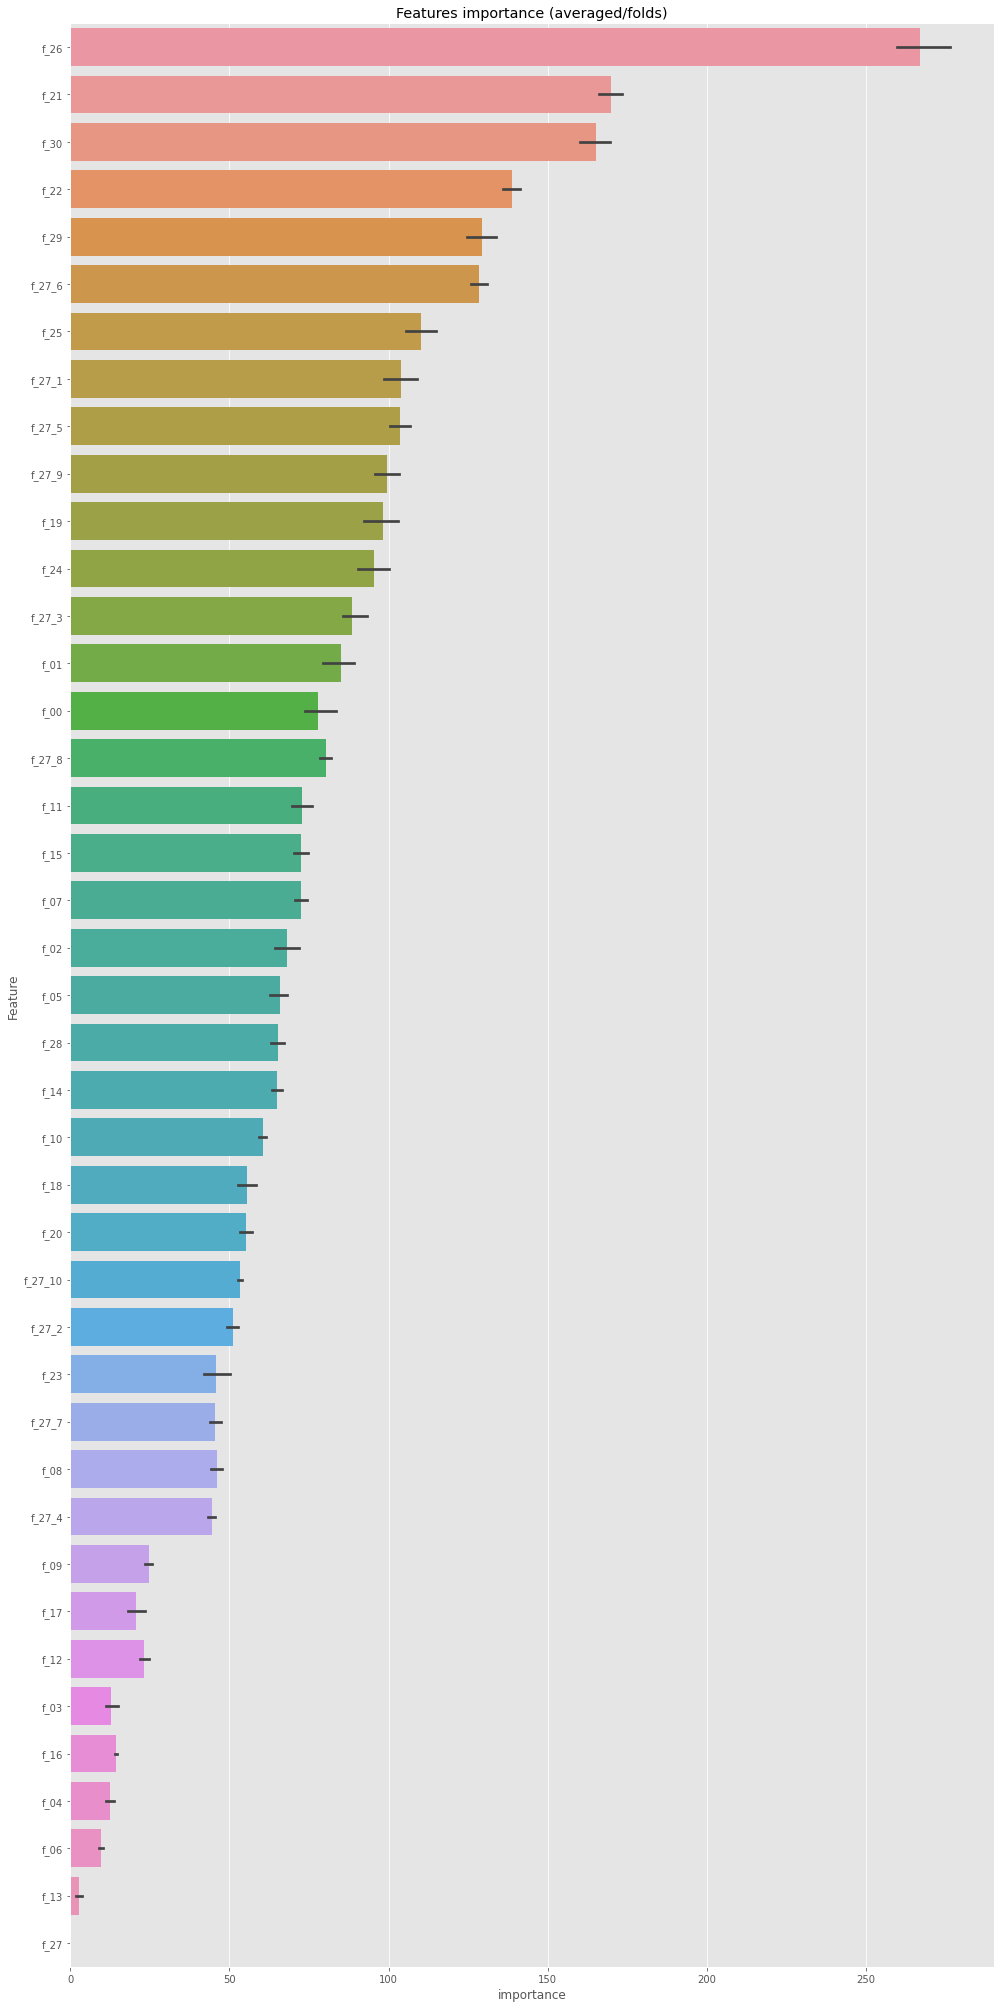

In [23]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:107].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [24]:
ss = pd.read_csv('sample_submission.csv')
ss.head()

,id,target
0,900000,0.5
1,900001,0.5
2,900002,0.5
3,900003,0.5
4,900004,0.5


In [25]:
ss.shape

(700000, 2)

In [26]:
predictions = np.mean(np.column_stack(preds),axis=1)

# ss['target'] = predictions
# ss.to_csv('lgbm.csv', index=False)
# ss.head()

## Cataboost

In [27]:
# %%time
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# preds = []
# scores = []
# feature_importance_df = pd.DataFrame()

# for fold, (idx_train, idx_valid) in enumerate(kf.split(X, y)):
#     X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
#     X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]
    
#     model = CatBoostClassifier(cat_features=)
    
#     model.fit(X_train, y_train,
#               eval_set = [(X_valid, y_valid)],
#               verbose = False,
#               early_stopping_rounds = 300)
    
#     pred_valid = model.predict_proba(X_valid)[:,1]
#     fpr, tpr, _ = roc_curve(y_valid, pred_valid)
#     score = auc(fpr, tpr)
#     scores.append(score)
    
#     fold_importance_df = pd.DataFrame()
#     fold_importance_df["Feature"] = X.columns
#     fold_importance_df["importance"] = model.feature_importances_
#     fold_importance_df["fold"] = fold + 1
#     feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
#     print(f"Fold: {fold + 1} Score: {score}" "\n")
#     print('||'*40, "\n")
    
#     test_preds = model.predict_proba(test)[:,1]
#     preds.append(test_preds)
    
# print(f"Overall Validation Score: {np.mean(scores)}")

In [28]:
# ss = pd.read_csv('sample_submission.csv')


# predictions = np.mean(np.column_stack(preds),axis=1)

# ss['target'] = predictions
# ss.to_csv('catboost.csv', index=False)
# ss.head()

### XGBoost

In [29]:
# %%time
# kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# preds = []
# scores = []
# feature_importance_df = pd.DataFrame()

# for fold, (idx_train, idx_valid) in enumerate(kf.split(X, y)):
#     X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
#     X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]
    
#     model = XGBClassifier()
    
#     model.fit(X_train, y_train,
#               eval_set = [(X_valid, y_valid)],
#               verbose = False,
#               early_stopping_rounds = 300)
    
#     pred_valid = model.predict_proba(X_valid)[:,1]
#     fpr, tpr, _ = roc_curve(y_valid, pred_valid)
#     score = auc(fpr, tpr)
#     scores.append(score)
    
#     fold_importance_df = pd.DataFrame()
#     fold_importance_df["Feature"] = X.columns
#     fold_importance_df["importance"] = model.feature_importances_
#     fold_importance_df["fold"] = fold + 1
#     feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
#     print(f"Fold: {fold + 1} Score: {score}" "\n")
#     print('||'*40, "\n")
    
#     test_preds = model.predict_proba(test)[:,1]
#     preds.append(test_preds)
    
# print(f"Overall Validation Score: {np.mean(scores)}")

In [30]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, t_train, t_test = train_test_split(X, y, test_size=0.2, random_state=0)

lgb_train = lgb.Dataset(X_train, t_train)
lgb_eval = lgb.Dataset(X_test, t_test, reference=lgb_train)

params = {
        'task': 'prediction',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'binary_logloss',
        'learning_rate': 0.05,#0.1
        'max_depth': -1,#-1
        'num_leaves': 35,#31
        'min_data_in_leaf': 20,#20
        'bagging_fraction': 1,#1.0
        'bagging_freq': 0,#0
        'feature_fraction': 1,#1.0
        'lambda_l1': 0.8,#0
        'lambda_l2': 0.8,#0
        'num_iterations': 20000,#100
        'verbosity': -1
}


model = lgb.train(
    params,
    train_set=lgb_train,
    valid_sets=lgb_eval,
    early_stopping_rounds=100,
    verbose_eval=100
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.430116
[200]	valid_0's binary_logloss: 0.359978
[300]	valid_0's binary_logloss: 0.327453
[400]	valid_0's binary_logloss: 0.309799
[500]	valid_0's binary_logloss: 0.29761
[600]	valid_0's binary_logloss: 0.287478
[700]	valid_0's binary_logloss: 0.280088
[800]	valid_0's binary_logloss: 0.273963
[900]	valid_0's binary_logloss: 0.26914
[1000]	valid_0's binary_logloss: 0.264881
[1100]	valid_0's binary_logloss: 0.261227
[1200]	valid_0's binary_logloss: 0.258214
[1300]	valid_0's binary_logloss: 0.255323
[1400]	valid_0's binary_logloss: 0.252556
[1500]	valid_0's binary_logloss: 0.250154
[1600]	valid_0's binary_logloss: 0.247411
[1700]	valid_0's binary_logloss: 0.245277
[1800]	valid_0's binary_logloss: 0.243335
[1900]	valid_0's binary_logloss: 0.24149
[2000]	valid_0's binary_logloss: 0.239341
[2100]	valid_0's binary_logloss: 0.237802
[2200]	valid_0's binary_logloss: 0.236185
[2300]	valid_0's binary_lo

In [33]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['target'] = model.predict(test)
sample_submission

ValueError: Length of values (900000) does not match length of index (700000)